David Felipe Mora Ramirez - Ciencias de la computación

# Tarea 3 

## Prerequisitos

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import log10, floor

import scipy.linalg as la
import scipy.io as io
import scipy.sparse.linalg as sprs
from scipy.special import comb

import pandas as pd

from time import time

import requests


np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

# Problemas


## Problema 1

Considere la matriz de segundas diferencias $A$ definida por 
$$a_{ij}=\left\{\begin{array}{cl}
-2, & i=j,\\
1, & |j-i|=1,\\
0, & |j-i|>1.
\end{array} \right.$$
Considere tambien la matriz de Frank de dimension $n\times n$, 
$$
A=\left(\begin{array}{cccccccccc}
n & n-1 & n-2 & n-3 & n-4& \dots 1\\
n-1 & n-1 &n-2 &n-3 & n-4 &\dots 1\\
0 & n-2 & n-2 & n-3 & n-4 & \dots 1\\
0&0&n-3 &n-3 & n-4&\dots 1 \\
\vdots& \ddots&\ddots &\ddots &\ddots &\dots
\end{array}\right)
$$

Note que en la diagonal principal, es decir, la diagonal 0 tenemos los números $n,n-1,\dots,1$, en la diagonal $1$ y $-1$ tenemos $n-1,n-2,\dots,1$. En la diagonal $k>1$ tenemos $n-k,n-k-1,\dots,1$ y en la diagonal $-k$ con $k>1$ tenemos entradas nulas. Esta matriz es un ejemplo de matriz de Hessenberg. 



1.   Que propiedades puede listar de las matrices de segundas diferencias y de Frank
2.   Investigue como medir el tiempo de ejecución de un comando en python o MatLab y 
calcule el tiempo de resolver un sistema  $Ax=b$ con $A$ una matriz de 
 segundas diferencias de segundo orden de dimension $n=2,4,8,1,32,64,128,\dots$. Tome  $b=(1,1,\dots,1)^T.$
3. Repita con la matriz de Frank.
4. Repita con la matriz de Hilbert.



**SOLUCIÓN**

**Matriz de segundas diferencias**
- Simetrica.
- Definida Positiva.
- Diagonal dominante.
- $Det(T_n)$ = $n+1$ donde $T_n$ es la matriz de segundas diferencias de orden $n$.
- $Cond_2(T_n) \approx \frac{4n^2}{\pi^2}$.
- Valores propios: $\mu_k = 4 \sin^2{\frac{k\theta}{2}}$, donde $\theta = \frac{\pi}{n+1}$ y $1 \leq k \leq n$.

Para mas información consultar [What Is the Second Difference Matrix?](https://nhigham.com/2022/01/31/what-is-the-second-difference-matrix/)

**Matriz de Frank**
- $Det(F_n) = 1$ donde $F_n$ es la matriz de Frank de orden $n$.
- $Cond(F_n) \geq (n-1)!||F_n||$ para cualquier norma subordinada.

Para mas información consultar [What Is the Frank Matrix?](https://nhigham.com/2022/01/25/what-is-the-frank-matrix/)

-----

Para realizar las pruebas de tiempo, vamos a usar la siguiente función, la cual recibe como argumento el tipo de matriz en forma de función.

In [2]:
def time_solve(matrix_type):
    print(f"{matrix_type.__name__} matrix")
    for n in [2, 4, 8, 16, 32, 64, 128]:
        A = matrix_type(n)
        b = np.array([1 for i in range(n)])
        start = time()
        la.solve(A, b) 
        print(f"Tiempo orden {n}: {time() - start} segundos.")

**Tiempo en resolver matriz de segundas diferencias**

In [3]:
def second_differences(n):
    return np.diag([1 for i in range(n - 1)], -1) + \
           np.diag([-2 for i in range(n)], 0)  + \
           np.diag([1 for i in range(n - 1)], 1)

time_solve(second_differences) 

second_differences matrix
Tiempo orden 2: 0.0008111000061035156 segundos.
Tiempo orden 4: 0.0002319812774658203 segundos.
Tiempo orden 8: 0.0002593994140625 segundos.
Tiempo orden 16: 0.0021588802337646484 segundos.
Tiempo orden 32: 0.00040650367736816406 segundos.
Tiempo orden 64: 0.00013065338134765625 segundos.
Tiempo orden 128: 0.00048089027404785156 segundos.


**Tiempo en resolver matriz de Hilbert**

In [4]:
time_solve(la.hilbert)

hilbert matrix
Tiempo orden 2: 0.00017714500427246094 segundos.
Tiempo orden 4: 0.00028204917907714844 segundos.
Tiempo orden 8: 0.0002033710479736328 segundos.
Tiempo orden 16: 0.0002887248992919922 segundos.
Tiempo orden 32: 0.0004703998565673828 segundos.
Tiempo orden 64: 0.0005009174346923828 segundos.
Tiempo orden 128: 0.00054168701171875 segundos.


<ipython-input-2-d0e03666c536>:7: LinAlgWarning: Ill-conditioned matrix (rcond=7.09847e-19): result may not be accurate.
  la.solve(A, b)
<ipython-input-2-d0e03666c536>:7: LinAlgWarning: Ill-conditioned matrix (rcond=4.41451e-20): result may not be accurate.
  la.solve(A, b)
<ipython-input-2-d0e03666c536>:7: LinAlgWarning: Ill-conditioned matrix (rcond=2.88149e-21): result may not be accurate.
  la.solve(A, b)
<ipython-input-2-d0e03666c536>:7: LinAlgWarning: Ill-conditioned matrix (rcond=8.96855e-21): result may not be accurate.
  la.solve(A, b)


**Tiempo en resolver matriz de Frank**

In [5]:
def frank(n):
    frank = np.diag([i for i in range(n-1, 0, -1)], -1) # -1 diag
    for i in range(n, 0, -1):
        frank = frank + np.diag([j for j in range(i, 0, -1)], n-i)
    return frank

time_solve(frank)

frank matrix
Tiempo orden 2: 0.0003628730773925781 segundos.
Tiempo orden 4: 0.000362396240234375 segundos.
Tiempo orden 8: 7.200241088867188e-05 segundos.
Tiempo orden 16: 9.775161743164062e-05 segundos.
Tiempo orden 32: 0.0004787445068359375 segundos.
Tiempo orden 64: 0.0002052783966064453 segundos.
Tiempo orden 128: 0.0004665851593017578 segundos.


<ipython-input-2-d0e03666c536>:7: LinAlgWarning: Ill-conditioned matrix (rcond=1.39114e-19): result may not be accurate.
  la.solve(A, b)
<ipython-input-2-d0e03666c536>:7: LinAlgWarning: Ill-conditioned matrix (rcond=4.01479e-20): result may not be accurate.
  la.solve(A, b)
<ipython-input-2-d0e03666c536>:7: LinAlgWarning: Ill-conditioned matrix (rcond=2.57087e-20): result may not be accurate.
  la.solve(A, b)


Para las matrices de Hilbert y de Frank los ultimos resultados posiblemente estan bastante errados ya que el número de condición de estas matrices es muy grande.

## Problema 2
Considere la matriz de Hilbert $H(n)$ con $n=4,5,6,\dots$.


1.   Para $n=5,6,7,\dots$ calcule $\lambda(n)$ el menor valor propio de $H(n)$. Grafique este vector.
2.   Al intentar hacer a factorización de Cholesky de $H(20)$ en Octave/Matlab/Python la factorización no se calcula llevando a la conclución de que la representación numérica de $H(20)$ no es definida positiva. En Octave parece el error 
```
# error: chol : imput matrix must be positive definite
```
Verifique teoricamente  $H(n)$ es en realidad positiva definida (no necesita mostrar detalles aqui). Con ayuda del gráfico anterior y de lo estudiado sobre artimética de punto flotante explique esta situación.
3. Calcule $R(n)$ de la factorización de Cholesky de $H(n)=R(n)^TR(n)$ con $n=14,15,\dots,20$. Presente un gráfico de $t(n)=tr(R(n))$ como evidencia del cálculo.




**SOLUCIÓN**

Calculemos $\lambda(n)$ de la matriz de Hilbert $H(n)$:

,Min eigenvalues
5,3.287929e-06
6,1.082799e-07
7,3.493899e-09
8,1.111539e-10
9,3.499686e-12
10,1.093228e-13
11,3.402117e-15
12,1.083040e-16
13,4.868852e-19
14,-6.020253e-18


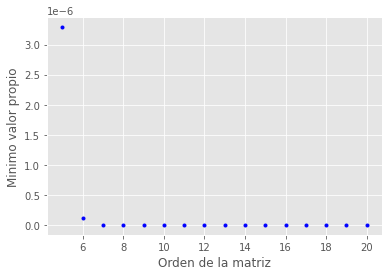

In [6]:
lambdas = []

for n in range(5, 21):
    A = la.hilbert(n)
    min_eig = min(la.eigvals(A)).real
    lambdas.append(min_eig)

plt.style.use('ggplot')
plt.plot(range(5, 21), lambdas, "bo", markersize=3)
plt.ylabel("Minimo valor propio")
plt.xlabel("Orden de la matriz")

display(pd.DataFrame(lambdas, index=range(5, 21), columns=["Min eigenvalues"]))
plt.show()

La grafica no le hace mucha justicia a la escala de los valores, por lo tanto vamos a graficar los exponentes de los valores para tener una mejor idea de sus magnitudes.

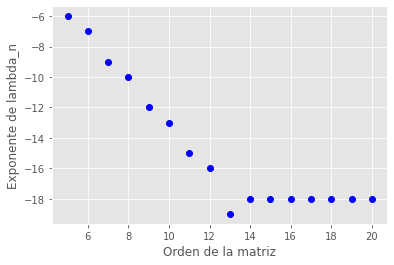

In [7]:
def find_exp(number) -> int:
    base10 = log10(abs(number))
    return abs(floor(base10))
ord_mag = [-find_exp(l) for l in lambdas]

plt.style.use('ggplot')
plt.plot(range(5,21), ord_mag, "bo")
plt.ylabel("Exponente de lambda_n")
plt.xlabel("Orden de la matriz")

plt.show()

----

Como la matriz de Hilbert es simetrica y valores propios son todos positivos, entonces es definida positiva.

El calculo de los valores propios muy probablemente involucra un número considerable de operaciones aritmeticas de punto flotante, el cual muy posiblemente aumenta con el orden de la matriz. Por esta razón es bastante probable que los errores asociados al redondeo de operaciones sean grandes a medida que el tamaño de la matriz aumenta. Dicho esto y como los menores autovalores de la matriz de Hilbert son particularmente cercanos a 0(posiblemente tienden a 0), produce que el valor final sea negativo y por lo tanto la matriz no sea definida positiva. Adicionalmente, es posible que el número de condición de la matriz de Hilbert, el cual es muy grande, afecte en la precision de estos calculos.

----

Ahora calculamos la factorización de Cholesky de la matriz de hilbert, sumando un epsilon a la diagonal para que esta sea definida positiva en punto flotante:

Traza de la R(n) = 1.3884684089646913
Traza de la R(n) = 1.388468570687234
Traza de la R(n) = 1.3884687043265003
Traza de la R(n) = 1.388468831404336
Traza de la R(n) = 1.3884689244614477
Traza de la R(n) = 1.3884690100109052
Traza de la R(n) = 1.388469086993479


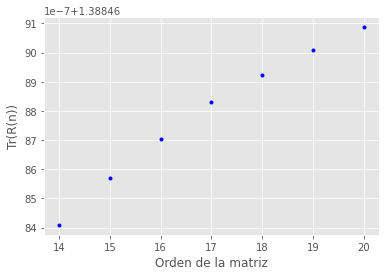

In [8]:
trs = []
for n in range(14, 21):
    A = la.hilbert(n) + np.diag([1e-16 for i in range(n)])
    tr = np.trace(la.cholesky(A))
    trs.append(tr)
    print(f"Traza de la R(n) = {tr}")
    
plt.plot(range(14,21), trs, "bo", markersize=3)
plt.ylabel("Tr(R(n))")
plt.xlabel("Orden de la matriz")
plt.show()

## Problema 3
Considere la matriz de Hilbert $H(n)$ con $n=4,5,\dots,20$. Existe una fórmula exacta para la inversa de $H(n)$, implemente esta fórmula. Con el comando de MatLab o Python para calcular la inversa calcule $G=inv(H(n))$. Compare y comente los resultados.

La implementación de la formula exacta para la inversa de la matriz de Hilbert es la siguiente:

In [9]:
def invhilbert(n):
    invh = np.empty((n, n))
    for i in range(n):
        for j in range(0, i + 1):
            s = i + j
            invh[i, j] = ((-1) ** s * (s + 1) *
                          comb(n + i, n - j - 1, True) *
                          comb(n + j, n - i - 1, True) *
                          comb(s, i, True) ** 2)
            if i != j:
                invh[j, i] = invh[i, j]
    return invh

Para comparar mejor los resultados, se tomó la norma subornidada de la diferenceia de las dos matrices, aqui podemos notar lo siguiente: 

In [10]:
for n in range(4, 21):
    A = invhilbert(n)
    B = la.inv(la.hilbert(n))
    print(f"norm difference hilbert({n}) = {la.norm(A-B, 2)}")

norm difference hilbert(4) = 9.90517413756832e-10
norm difference hilbert(5) = 2.426432425357094e-07
norm difference hilbert(6) = 0.00036692335987427297
norm difference hilbert(7) = 0.22004619865135133
norm difference hilbert(8) = 527.4679444583969
norm difference hilbert(9) = 1205399.999284159
norm difference hilbert(10) = 1160824727.9715245
norm difference hilbert(11) = 763638579710.3049
norm difference hilbert(12) = 452933788108745.6
norm difference hilbert(13) = 1.108451289111141e+17
norm difference hilbert(14) = 1.0497002681909414e+19
norm difference hilbert(15) = 3.315854117357593e+20
norm difference hilbert(16) = 1.0872852144025739e+22
norm difference hilbert(17) = 3.575617941447342e+23
norm difference hilbert(18) = 1.1782153119711746e+25
norm difference hilbert(19) = 3.8891745420053576e+26
norm difference hilbert(20) = 1.2857804745883246e+28




- A medida que el $n$ aumenta,la diferencia aumenta rapidamente, alcanzando 1e28 en tan solo $n = 20$.
- El calculo de la inversa mediante la función `inv()` se realiza mediante una factorización LU y resolviendo un sistema lineal, en clase vimos que este procedimiento incurre en aproximandamente $O(n^3)$ operaciones de punto flotante. Por otro lado, el algoritmo de la formula directa de la inversa usa aproximadamente $O(n^2)$ operaciones. Dicho esto  es claro que el primer metodo acarrera errores mas grandes. 
- Por otro lado, se sabe que la matriz de hilbert tiene un número de condición grande, lo que significa que es posible que en la solución de los sistemas que se hacen para hallar la inversa se tengan errores grandes.

## Problema 4
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sandia/oscil_dcop_21. El archivo .mat puede ser recuperado de 
https://suitesparse-collection-website.herokuapp.com/mat/Sandia/oscil_dcop_21.mat .
Gráfique el patrón de dispersión de esta matriz. Liste (con justificación numérica) las propiedades de esta matriz. 

Primero descargamos la matriz:

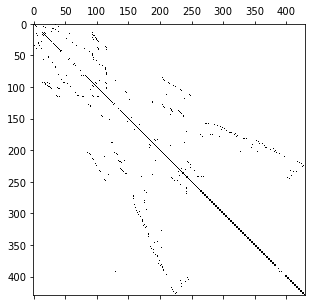

In [4]:
url = "https://suitesparse-collection-website.herokuapp.com/mat/Sandia/oscil_dcop_21.mat"
res = requests.get(url, allow_redirects=True)


with open('oscil_dcop_21.mat', 'wb') as f:
    f.write(res.content)
    
A = io.loadmat('oscil_dcop_21')["Problem"]["A"][0][0]
b = np.ones(A.shape[1])

plt.figure(figsize=(5, 5))
plt.spy(A.toarray())
plt.show()

-----

**Propiedades**

Para verificar las propiedades vamos a pasar la matriz a un arreglo de numpy.

In [5]:
D = A.toarray()

No es simetrica

In [13]:
(D == np.transpose(D)).all()

False

No es definida positiva ya que la factorización de cholesky falla.  

In [8]:
try:
    la.cholesky(D)
except Exception as e: 
    print(e)

7-th leading minor of the array is not positive definite


Tiene una norma 2 de:

In [15]:
la.norm(D, 2)

2001004.2911866505

Su número de condición es:

In [16]:
np.linalg.cond(D)

228387375975163.12

# Problema 5
Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sandia/oscil_dcop_21. Use un método iterativo (diferente de Jacobi) para resolver el sistema $Ax=b$
con $b=(1,1,\dots,1)$. 

El modulo `sparce.linalg` de `scipy` tiene varios metodos especialmente diseñados para matrices en formartos esparsos(COO, CRC), entre los que se encuentran metodos directos e iterativos para resolver sistemas lineales:

Vamos a probar los siguientes metodos(iterativos) respectivamente:
- `bicg()` Metodo del gradiente biconjugado.
- `cg()` Metodo del gradiente conjugado.
- `gmres()` Generalized Minimal RESidual. 

Estos metodos retornan una tupla:
- x: la solución que da la iteración.
- info:
 - info = 0 si el metodo fue exitoso.
 - info > 0, si el metodo no alcanzo la toleracia(1e-05), info = número de iteraciones.
 - info < 0, input incorrecto o fallo.

Desafortudamente ninguno de los metodos logró converger:

In [17]:
x = sprs.bicg(A, b)
print(x[1])
print(f"Residuo: {la.norm(x[0] - A@b)}")

4300
Residuo: 259667.1869760995


In [18]:
x = sprs.cg(A, b)
print(x[1])
print(f"Residuo: {la.norm(x[0] - A@b)}")

4300
Residuo: 43433.880610220505


In [19]:
x = sprs.gmres(A, b)
print(x[1])
print(f"Residuo: {la.norm(x[0] - A@b)}")

4300
Residuo: 43401.18839575955


Todos los metodos hicieron 4300 iteraciones y el que obtuvó el mejor residuo ~43401 fue Generalized Minimal RESidual, aunque aun asi es un residuo bastante grande.

# Problema 6
Considere la matriz https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015.  Que puede decir del problema asociado a esta matriz? 

El problema asociado a esta matriz se encuentra en el contexto de la investigación academica, en especifico del area de la biomedicina. El problema especifico, que intenta atacar es el de reducir costos y tiempo para la producción cientifica, esto debido a que al momento de incurrir en esta practica se deben explorar de forma exhaustiva posiblemente miles de direcciones de investigacion solo para seleccionar unas pocas que puedan ser estudiadas a mayor profundidad y sin garantia de producir resultados hasta este punto. 

A traves de los sistemas de generación de hipotesis, pero espeficiamente en el caso de AGATHA se pretende usar un enfoque basado en datos para sugerir de forma educada posibles direcciones de invesigación, reduciendo asi costos y tiempo. Este sistema ayudaria a los investigadores a descubir relaciones implicitas a traves de tecnicas de deep learning, que de otra forma tomarian posiblemente mucho mas tiempo debido al aumento de la produccion cientifica. 

El sistema tiene dos fases principalmente:
 - Primero construye un grafo semantico multicapa a partir del amplio rango de dominios de investigación de la base de datos de MEDLINE. Este grafo corresponde a la matriz que se encuentra en la pagina de suite sparse collection.
 - Despues se usa un _tranformer encoder_ para aprender un criterio de evaluacion  entre las regiones del grafo semantico y las posibles nuevas direcciones de investigación para poder generar hipotesis de investigación.

El paper [AGATHA: Automatic Graph-mining And Transformer based
Hypothesis generation Approach](https://arxiv.org/pdf/2002.05635.pdf).